# Python aflevering 1
### Af Emil Hedegaard

I denne opgave vil jeg plotte data fra lab forsøget "Pendulets svingningstid", og se på om jeg kan finde en model for svingningstid der passer med data.

Jeg vil starte med at gemme data i numpy arrays. Derefter vil jeg plotte data, med og uden errorbars.  
Så vil jeg se på hvad man kan konkludere ud fra dataet. Jeg ser på forholdet mellem længde, og svingningstid. 
Derefter ser jeg kort på forholdet mellem vinkel og svingningstid.

Aflevere notebook, og pdf med grafer, og excel  


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Importere data
Jeg vil starte med at importere data. Data er i en excelfil, og importeres i blokken herunder.  
Data til variation af længde, og vinkel var mangelfuld, så den suppleres med data fra filen 
``` Data_pendulforsøg_til_python_opgave.txt```, som var givet som en del af afleveringen. Det er uddybet i et senere afsnit



Note: Jeg bruger filens placering. Hvis man prøver at bruge koden uden at have filen samme sted duer det ikke. Så skal man bare ændre den 2. linje for at fikse det.

In [2]:
import pandas

file = pandas.read_excel(r"C:\Users\Emil Hedegaard\Desktop\Noter - Alle\Universitet\Fysik\MekRel lab\Pendul svingning.xlsx")

# Excel gøres til numpy array
excel = np.asarray(pandas.DataFrame(file))

# Funktioner til at få data
def getDatafromExcel(column, length):
    return np.array([excel[4+i][column] for i in range(length)]), np.array([excel[4+i][column+1] for i in range(length)])


# Vælg de rigtige data
# For variation af masse
m_data, T_m = getDatafromExcel(1, 10)

# For variation af længde
l_data, T_l = getDatafromExcel(5, 5)

# For variation af vinkel (ikke gjort, fordi data ikke var gode)
# v_data, T_v = getDatafromExcel(9, 4)
# Jeg bruger data fra .txt filen istedet


Nu har jeg data fra forsøget. Jeg vil supplere det med data vi fik. Det skaber intet problem med variation af snorlængde, siden der i begge datasæt er brugt $m = 100 g$ og $v = 45$ grader.

Til data om variation af vinkel er der ikke brugt samme snorlængde og masse som dem fra filen, så jeg bruger bare ikke noget af egen data.

In [3]:
# For variation af vinkel
v_data = np.array([10.2, 16,  20.6, 26.2, 32.5, 37.6, 43.4, 48.3, 54.2, 60.3])
T_v = np.array([0.9, 1,  1,  0.9, 0.9, 1.1, 1.1, 1.1, 1,  1 ])

# Tilføj data til variation af længde
l_data = np.append(l_data, [9.1, 13.5, 18,  22.4, 26.9, 31.3, 35.8, 40.2, 44.7, 49.1])
T_l = np.append(T_l, [0.6, 0.7, 0.7, 1,  1.1, 1,  1.4, 1.5, 1.2, 1.5])



#### Plot data

Nu vil jeg gerne plotte data. I vejledningen stod plot data, og tilføj errorbars som to forskellige punkter. Derfor starter jeg med at plotte uden errorbars, og tilføjer dem derefter.

Jeg giver alle plots aksebeskrivelser, osv.

Vinkler har ikke en enhed. Jeg har valgt at skrive "grader symbolet" på enhedens plads, for at gøre det klart at der er brugt grader. Man skal ikke forstå det som enhed.


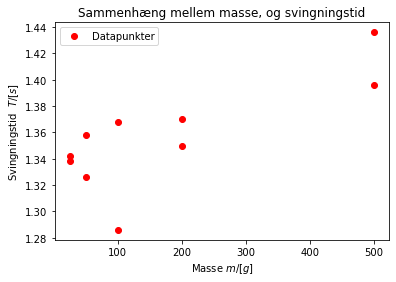

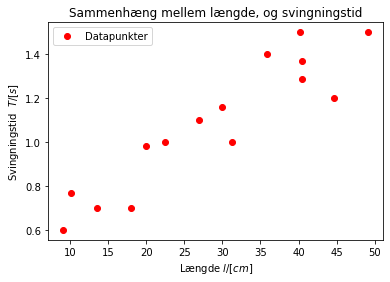

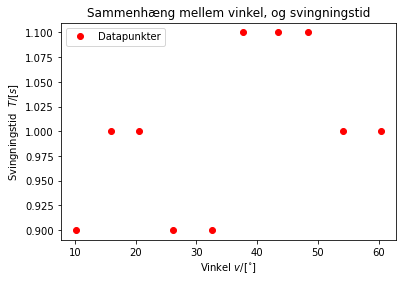

In [4]:
def plotData(x, y, var, unit):
    plt.plot(x, y, "ro", label="Datapunkter")
    plt.ylabel(r"Svingningstid  $T / [s]$")
    plt.xlabel(fr"{var.capitalize()} ${var[0]} / [{unit}]$")
    plt.legend()
    plt.title(f"Sammenhæng mellem {var}, og svingningstid")
    #plt.savefig(f"Uden errors {var}.pdf") 
    plt.show()

# Plot med masse
plotData(m_data, T_m, "masse", "g")


# Plot med længde
plotData(l_data, T_l, "længde", "cm")


# Plot med vinkel
plotData(v_data, T_v, "vinkel", "^{\circ}")



#### Tilføjelse af errorbars
Nu vil jeg tilføje errorbars til mine plots. Jeg finder usikkerheden ud fra data om masseafhængighed. Det er fordi vi tog 2 målinger med hver masse. Derfra kan vi så finde usikkerheden på T, som formentlig er den samme i alle forsøg.  

Vi har ingen rigtig metode for at finde usikkerheden for masse, vinkel, længde. Derfor har jeg valgt bare at tage usikkerhederne for det fra .txt filen.



In [5]:
# Finde usikkerhed
i = 0
uncertainty = []
while i<len(T_m):
    points = [T_m[i], T_m[i+1]]
    uncertainty.append(max(points) - min(points))
    i += 2

# Printe den højste forskel, og den gennemsnitlige forskel
print(f"Den højeste forskel mellem to målinger var {round(max(uncertainty), 5)} s")
print(f"Den gennemsnitlige forskel var {round(np.mean(uncertainty), 5)} s")



Den højeste forskel mellem to målinger var 0.082 s
Den gennemsnitlige forskel var 0.0356 s


Jeg kommer til at bruge den største forskel til at lave errorbars. Normalt ville man ikke gøre det på den måde, man ville udregne standardafvigelse, og derfra finde usikkerheden. Men i uge 1, gjorde min gruppe ikke det, og siden dette går ud på at genskabe de grafer kommer jeg til at bruge den største forskel.

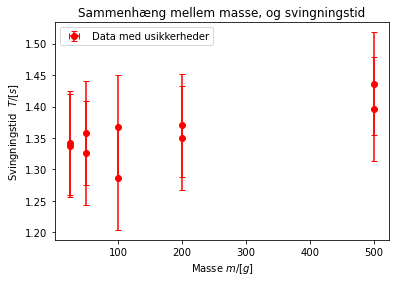

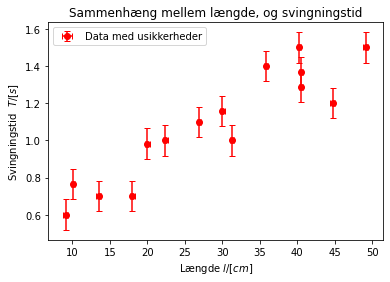

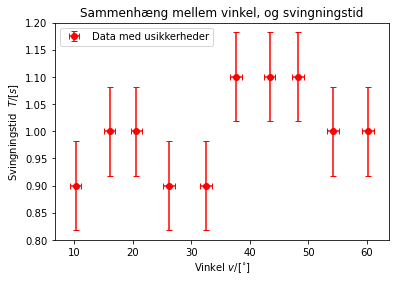

In [6]:
error = max(uncertainty)

# Grafer med errorbars funktion. Den er lidt lang fordi jeg også tilføjer ting til næste afsnit
def errorPlots(x, y, var, unit, error_x, error_y=error, bar=False):
    plt.errorbar(x, y, yerr=error_y, xerr=error_x, label="Data med usikkerheder", fmt="ro", capsize=3)
    plt.ylabel(r"Svingningstid  $T / [s]$")
    plt.xlabel(fr"{var.capitalize()} ${var[0]} / [{unit}]$")
    if bar!=False:
        plt.axhline(bar, label="Middelværdi af svingningstid")
    plt.legend()
    plt.title(f"Sammenhæng mellem {var}, og svingningstid")
    #plt.savefig(f"Med errors {var}, og bar={bar}.pdf") 
    plt.show()

# Nu laves graferne
errorPlots(m_data, T_m, "masse", "g", 1)
errorPlots(l_data, T_l, "længde", "cm", 0.3)
errorPlots(v_data, T_v, "vinkel", "^{\circ}", 1)




#### Analyse af data

Fra plottene med errorbars kan man nok nogenlunde se hvordan variablerne hænger sammen, men i dette afsnit vil jeg prøve at se lidt mere på dette.  
Jeg vil starte med at se på forholdet mellem masse, og svingningstid. Det ser ud som om at usikkerheden er stor nok til at dataet passer med at der intet forhold er. Nu laver jeg grafer af det for at se at det passer.


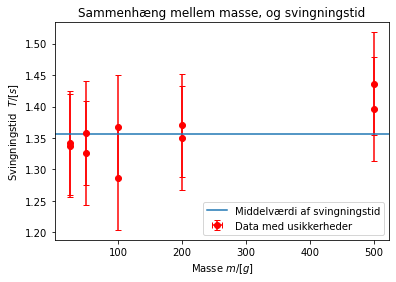

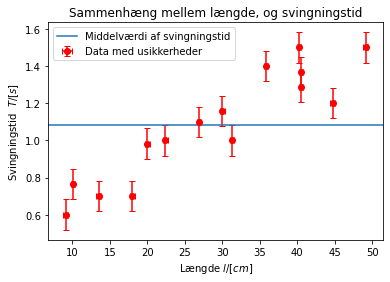

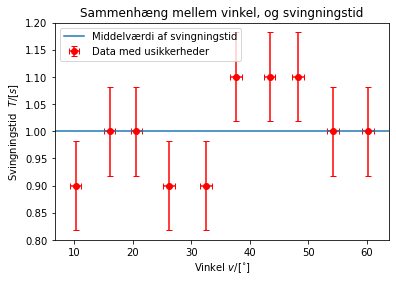

In [7]:
# Jeg laver grafer med en linje for middelværdien af svingningstid
errorPlots(m_data, T_m, "masse", "g", 1, bar=np.mean(T_m))
errorPlots(l_data, T_l, "længde", "cm", 0.3, bar=np.mean(T_l))
errorPlots(v_data, T_v, "vinkel", "^{\circ}", 1, bar=np.mean(T_v))


Man kan se at data ikke understøtter en sammenhæng mellem masse og svingningstid. Derimod er der tydeligvis en sammenhæng mellem længde og svingningstid.  
Det ser ikke ud som om der er en sammenhæng mellem vinkel og svingningstid, men alle errorbars når ikke middelværdien. Data for vinkler kom fra .txt filen, som havde en anden usikkerhed end vores forsøg, og hvis man bruger usikkerheden fra filen, så når alle errorbars middelværdien.   

Nu vil jeg se på mulige modeller for sammenhængen mellem længde og svingningstid.  


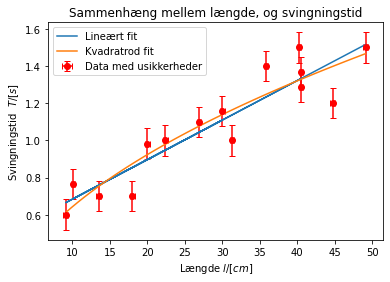

Lineære parametre var var [0.02128442 0.47086679] +- [2.8786103331655458e-06, 0.0028370067238237227]
Kvadratrods parametre var [ 0.21430399 -0.03494483] +- [0.00029019199781642896, 0.008359465317108529]


In [12]:
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a*x+b

def sqrt(x, a, b):
    return a*(x)**0.5+b

l_par, l_cov = curve_fit(linear, l_data, T_l, sigma = [error]*len(T_l), absolute_sigma = True)
s_par, s_cov = curve_fit(sqrt, l_data, T_l, sigma = [error]*len(T_l), absolute_sigma = True)

values = np.linspace(min(l_data), max(l_data), 50)

var = "længde"
plt.errorbar(l_data, T_l, error, 0.3, label="Data med usikkerheder", fmt="ro", capsize=3)
plt.plot(l_data, linear(l_data, *l_par), label="Lineært fit")
plt.plot(values, sqrt(values, *s_par), label="Kvadratrod fit")
plt.ylabel(r"Svingningstid  $T / [s]$")
plt.xlabel(fr"{var.capitalize()} ${var[0]} / [cm]$")
plt.legend()
plt.title(f"Sammenhæng mellem {var}, og svingningstid")
#plt.savefig("Regression.pdf") 
plt.show()

print(f"Lineære parametre var var {l_par} +- {[l_cov[0][0], l_cov[1][1]]}")
print(f"Kvadratrods parametre var {s_par} +- {[s_cov[0][0], s_cov[1][1]]}")

In [9]:
# Udregning af R^2, fundet online
difference_l = T_l - linear(l_data, *l_par)
R_2 = 1 - (np.sum(difference_l**2) / np.sum((T_l-np.mean(T_l))**2))
print(f"R^2 = {round(R_2, 4)} for lineært fit")

difference_s = T_l - sqrt(l_data, *s_par)
R_2 = 1 - (np.sum(difference_s**2) / np.sum((T_l-np.mean(T_l))**2))
print(f"R^2 = {round(R_2, 4)} for kvadratrod fit")


R^2 = 0.8524 for lineært fit
R^2 = 0.8572 for kvadratrod fit


Det er tydeligt at der er et forhold mellem længde og svingningstid. Dataet er dog ikke godt nok til at bedømme hvilken type forhold det er. Teoretisk set ville vi forvente at det var:
$$T=2\pi \sqrt{\frac{l}{g}}$$
Men det er svært at tjekke ud fra vores data. 
Værdierne af koefficienter til sqrt fittet passer dog godt med teorien (l er givet i cm, så det skal man være opmærksom på hvis man vil udregne det). 


#### Mest for sjov
Vi kan også kort se på vinkler. Tidligere så vi at der ikke rigtig var en sammenhæng mellem vinkel og svingningstid. Det ligner det heller ikke der skulle være fra den tidligere formel, men det burde der egentlig være. Når man udleder formlen har man nemlig differentialligningen:
$$\ddot{\theta} = - \frac{g}{l}\cdot sin(\theta)$$
Som man forsimpler ved at antage små vinkler. Det fungerer også fint nok men når vi vil se på forholdet mellem svingningstid og vinkel er det nok ikke den bedste ide. Nu prøver jeg at lave en lille model med svingningstidens afhængighed af startsvinkelen. 
Formlen for svingningstid der er brugt er:
$$T = 2\pi \sqrt{\frac{l}{g}} \sum_{n=0}^{\infty}((\frac{(2n)!}{(2^n\cdot n!)^2})^2 sin^{2n}(\theta/2))$$
Det er bare en jeg fandt online (https://en.wikipedia.org/wiki/Pendulum_(mechanics)#Legendre_polynomial_solution_for_the_elliptic_integral).  
Man kunne egentlig også have simuleret svingningstiden, ved at løse differentialligningen numerisk, men siden jeg kunne finde et teoretisk svar valgte jeg at bruge det.


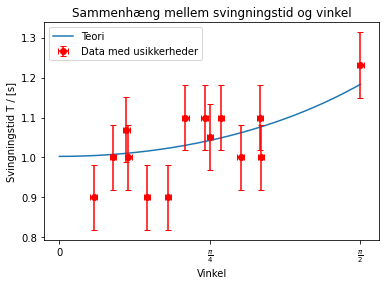

In [10]:
import math

# Funktionen der giver svingningstid ud fra længde og vinkel
def svingning(l, v):
    term = 0
    for i in range(1000):
        term += (math.factorial(2*i)/(2**(2*i)*math.factorial(i)**2))**2 * np.sin(v/2)**(2*i)
    return 2*np.pi*np.sqrt(l/9.82)*term

# Data til grafen. Her bruger jeg eget data, sammen med data fra .txt filen, da .txt filens vinkler kun gik op til 60 grader
# Siden længden af snoren ikke var den samme for eget data, og .txt filen har jeg brugt resultaterne fra tidligere om længde til
# at justere eget data
vinkler = np.linspace(0, np.pi/2, 10000)
v_data = np.array([10.2, 16,  20.6, 26.2, 32.5, 37.6, 43.4, 48.3, 54.2, 60.3])
T_v = np.array([0.9, 1,  1,  0.9, 0.9, 1.1, 1.1, 1.1, 1,  1 ])
a, b = getDatafromExcel(9, 4)
b= b - l_par[0]*5
v_data = np.append(v_data, a)
T_v = np.append(T_v, b)

# Her laves plottet
plt.plot(vinkler, svingning(0.25, vinkler), label="Teori")
plt.title("Sammenhæng mellem svingningstid og vinkel")
plt.xlabel("Vinkel")
plt.ylabel("Svingningstid T / [s]")
plt.xticks([0, np.pi/4, np.pi/2], ["0", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$"])
plt.errorbar(v_data/180 * np.pi, T_v, error, 1/180 * np.pi, label="Data med usikkerheder", fmt="ro", capsize=3)
plt.legend()
#plt.savefig("Ekstra svingningstid.pdf") 
plt.show()


Man kan se at data nogenlunde passer med den teoretiske model, dog passer det stadig fint med intet forhold. Data er ikke god nok til egentlig at bedømme noget, men det er stadig interessant at se at den teoretiske model passer.  
  
Egentlig burde masse også have en meget lille effekt, siden differentialligningen nok egentlig er:
$$\ddot{\theta} = -\frac{g}{l} sin(\theta)+\frac{F_{mod}}{m\cdot l}$$
Hvor $F_{mod}$ er kraft fra snorens friktion, og luftmodstand. Denne effekt er dog så lille at jeg har valgt ikke at arbejde med den. Forhåbentlig er det okay. Data er heller ikke tæt på gode nok til at de kan sige noget om det.  

### Konklusion
Med Python kan man plotte data som man har målt i lab. For data om et penduls svingningstid kan man se at der er et tydeligt forhold mellem svingningstid og længde af snor. Man kan også se at der ikke rigtig er nogen sammenhæng mellem vinkel, og svingningstid, samt masse og svingningstid. 



